In [ ]:
import requests
from IPython.display import Image


In [ ]:
import requests 
from bs4 import BeautifulSoup

URL = 'https://www.atacadao.com.br/catalogo'
website = requests.get(URL)

results = BeautifulSoup(website.content, 'html.parser')

results.text

# results.splitlines()

In [ ]:
#response = requests.get(f'https://restcountries.com/v3.1/all?fields=name,capital,continents,area,population')

response = requests.get('https://restcountries.com/v3.1/name/Brazil')

response.json()

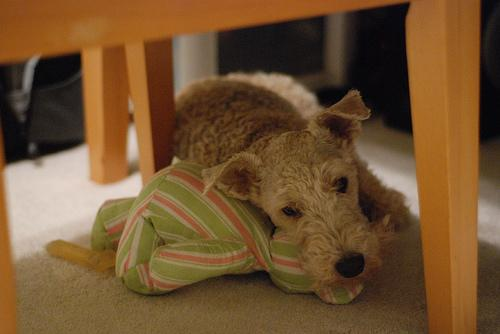

In [96]:

response = requests.get(f'https://dog.ceo/api/breeds/image/random')

Image(response.json()['message'])

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.set_capability("goog:loggingPrefs", {"performance": "ALL"})
options.add_experimental_option("detach", True),
options.add_argument(
    r"--user-data-dir=C:\Users\99810903\AppData\Local\Google\Chrome\User Data\Profile 1") #abre o chrome, digita chrome://version/ e copia o "caminho do perfil"
options.add_experimental_option("perfLoggingPrefs", {"enableNetwork": True})

browser = webdriver.Chrome(options=options)

delay = 5

for page in range(1,5):

    browser.get(f"https://www.atacadao.com.br/catalogo?productClusterIds=138&facets=productClusterIds&sort=score_desc&page={str(page)}")

    wrapper = WebDriverWait(browser, delay).until(
        EC.presence_of_element_located((By.XPATH,r'//*[@id="__next"]/main/section/div[2]/div[2]/div[3]/div[1]/ul/li[2]/article/div/section/h3'))
        )

    nav = browser.find_elements(By.TAG_NAME, 'h3')
    preços = [text for text in browser.find_elements(By.TAG_NAME, 'p') if text.text.startswith('R$')]

    print(f'pagina {page}')
    for item in zip(nav, preços):
        print(item[0].text, ' - ', item[1].text)

In [91]:
import pandas as pd
import polars as pl

produtos_atacadao = requests.get('https://www.atacadao.com.br/api/graphql?operationName=ProductsQuery&variables=%7B%22first%22%3A20%2C%22after%22%3A%220%22%2C%22sort%22%3A%22score_desc%22%2C%22term%22%3A%22%22%2C%22selectedFacets%22%3A%5B%7B%22key%22%3A%22productClusterIds%22%2C%22value%22%3A%22138%22%7D%2C%7B%22key%22%3A%22region-id%22%2C%22value%22%3A%22U1cjYXRhY2FkYW9icjg%3D%22%7D%2C%7B%22key%22%3A%22channel%22%2C%22value%22%3A%22%7B%5C%22salesChannel%5C%22%3A%5C%222%5C%22%2C%5C%22regionId%5C%22%3A%5C%22v2.58AF41F9B1F50018725A885A7CB8C910%5C%22%2C%5C%22seller%5C%22%3A%5C%22atacadaobr8%5C%22%7D%22%7D%2C%7B%22key%22%3A%22locale%22%2C%22value%22%3A%22pt-BR%22%7D%5D%7D')

#produtos_atacadao.json()

produtos = [x['node'] for x in produtos_atacadao.json()['data']['search']['products']['edges']]

len(produtos[0])



16

In [100]:
from datetime import datetime

df = pd.json_normalize(produtos, record_path= ['image'],
                       meta = ['id', 'sku', ['brand', 'name'], 'name', ['offers', 'highPrice'], ['offers', 'lowPrice']]
                       )

df['data'] = datetime.today()

df.columns = ['imagem', 'e', 'id', 'cod_sku_rede', 'fabricante', 'nome_prod', 'preço', 'preço_promocional', 'data']

df = df.drop('e', axis=1)

df.to_csv(f'atacadao_{datetime.today().day}-{datetime.today().month}.csv')

In [89]:
df['url'].to_list()

['https://atacadaobr.vtexassets.com/arquivos/ids/272305/m.jpg?v=638418539452700000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/281407/g.jpg?v=638465201590400000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/272006/m.jpg?v=638416811680300000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/272026/m.jpg?v=638416811920370000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/278249/m.jpg?v=638459147316370000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/268123/g.jpg?v=638379660041570000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/239783/g.jpg?v=638353833768500000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/230682/g.jpg?v=638353733341500000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/281244/g.jpg?v=638465199991470000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/277276/p.jpg?v=638447916154000000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/245228/g.jpg?v=638353893014230000',
 'https://atacadaobr.vtexassets.com/arquivos/ids/238822/g.jpg?v=6